<a href="https://colab.research.google.com/github/pravin-raut/TimeSeries_USD-EUR_WithOilImpact/blob/Master/04_Currency_%26_Oil_Forecast_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Joining both dataframe

In [3]:
df_oil_currency = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dissertation/df_oil_currency.csv")
df_oil_currency['Date'] = pd.to_datetime(df_oil_currency['Date']).dt.date

df_oil_currency.set_index('Date', inplace=True)
df_oil_currency.head(10)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-08,56.09,-0.631024,1.147974,0.486857,1.141044,1.139108,1.131811,1.146171,56.42,55.13,...,1.147289,58.22,59.46,60.00,58.39,58.24,2019,1,8,1
2019-01-09,58.22,-0.534464,1.145607,0.446000,1.147974,1.141044,1.139108,1.131811,56.09,56.42,...,1.141683,59.46,60.00,58.39,58.24,59.52,2019,1,9,2
2019-01-10,59.46,-0.478251,1.155495,0.616671,1.145607,1.147974,1.141044,1.139108,58.22,56.09,...,1.139809,60.00,58.39,58.24,59.52,59.63,2019,1,10,3
2019-01-11,60.00,-0.453771,1.151013,0.539312,1.155495,1.145607,1.147974,1.141044,59.46,58.22,...,1.139264,58.39,58.24,59.52,59.63,60.90,2019,1,11,4
2019-01-14,58.39,-0.526758,1.146014,0.453024,1.151013,1.155495,1.145607,1.147974,60.00,59.46,...,1.136557,58.24,59.52,59.63,60.90,61.49,2019,1,14,0
2019-01-15,58.24,-0.533558,1.147289,0.475036,1.146014,1.151013,1.155495,1.145607,58.39,60.00,...,1.136932,59.52,59.63,60.90,61.49,60.66,2019,1,15,1
2019-01-16,59.52,-0.475531,1.141683,0.378276,1.147289,1.146014,1.151013,1.155495,58.24,58.39,...,1.136402,59.63,60.90,61.49,60.66,60.52,2019,1,16,2
2019-01-17,59.63,-0.470544,1.139809,0.345931,1.141683,1.147289,1.146014,1.151013,59.52,58.24,...,1.138822,60.90,61.49,60.66,60.52,60.22,2019,1,17,3
2019-01-18,60.90,-0.412971,1.139264,0.336520,1.139809,1.141683,1.147289,1.146014,59.63,59.52,...,1.131350,61.49,60.66,60.52,60.22,60.90,2019,1,18,4


In [4]:
# Convert the Timestamp objects to datetime.date objects
train_end_date = pd.to_datetime('2022-12-31').date()
test_end_date = pd.to_datetime('2023-06-30').date()


In [5]:
train_data = df_oil_currency[df_oil_currency.index <= train_end_date].copy()
test_data = df_oil_currency[(df_oil_currency.index > train_end_date) & (df_oil_currency.index <= test_end_date)].copy()
test_data.tail(5)

,Actual_Oil_Price_t,Oil_Price_standardized,Actual_USD_EUR_Price_t,USD_EUR_Price_standardized,Actual_USD_EUR_Price_t-1,Actual_USD_EUR_Price_t-2,Actual_USD_EUR_Price_t-3,Actual_USD_EUR_Price_t-4,Actual_Oil_Price_t-1,Actual_Oil_Price_t-2,...,Actual_USD_EUR_Price_t+5,Actual_Oil_Price_t+1,Actual_Oil_Price_t+2,Actual_Oil_Price_t+3,Actual_Oil_Price_t+4,Actual_Oil_Price_t+5,Year,Month,Day,DayOfWeek
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-26,74.65,0.210361,1.090667,-0.502253,1.095890,1.099264,1.092037,1.092430,74.14,76.83,...,1.090750,75.15,74.38,74.34,76.14,76.12,2023,6,26,0
2023-06-27,75.15,0.233028,1.091048,-0.495679,1.090667,1.095890,1.099264,1.092037,74.65,74.14,...,1.091310,74.38,74.34,76.14,76.12,76.18,2023,6,27,1
2023-06-28,74.38,0.198121,1.095722,-0.415001,1.091048,1.090667,1.095890,1.099264,75.15,74.65,...,1.088495,74.34,76.14,76.12,76.18,76.61,2023,6,28,2
2023-06-29,74.34,0.196308,1.091584,-0.486431,1.095722,1.091048,1.090667,1.095890,74.38,75.15,...,1.085658,76.14,76.12,76.18,76.61,77.56,2023,6,29,3
2023-06-30,76.14,0.277908,1.086803,-0.568949,1.091584,1.095722,1.091048,1.090667,74.34,74.38,...,1.089064,76.12,76.18,76.61,77.56,78.43,2023,6,30,4


In [6]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Function to Compare Plot

In [7]:
def compare_plots(col1, col2, label1, label2, title):
    plt.figure(figsize=(16,8))
    plt.plot(col1,label=label1)
    plt.plot(col2,label=label2)
    plt.title(title)
    plt.legend(loc="upper left")
    plt.show()


# Function to Create the Metrics for Model Evaluation




In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred, col1, col2, steps_ahead):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Original Column": col1, "Predicted Column": col2, "Steps Ahead": steps_ahead,
            "Mean Absolute Error": mae, "Mean Squared Error": mse,
            "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}


In [9]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

def find_best_svr_params(X_train, Y_train):
    # Define the parameter search space for all kernels
    param_grid = [
        {'kernel': ['linear'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10]}
        ,{'kernel': ['rbf'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
        ,{'kernel': ['sigmoid'], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
        #,{'kernel': ['poly'], 'degree': [2], 'C': [0.1, 1, 10, 100], 'epsilon': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]}
    ]

    # Define the time-series cross-validation object
    tscv = TimeSeriesSplit(n_splits=10)

    # Create the grid search object
    grid_search = GridSearchCV(SVR(), param_grid, cv=tscv, scoring='r2')  # Use 'r2' scoring

    # Fit the grid search object to the data
    grid_search.fit(X_train, Y_train)

    # Get the results as a DataFrame
    results_df = pd.DataFrame(grid_search.cv_results_)

    # Sort the DataFrame by the mean_test_score in descending order
    results_df = results_df.sort_values(by='mean_test_score', ascending=False)

    # Reset the index of the DataFrame
    results_df = results_df.reset_index(drop=True)

    # Select only the columns of interest
    columns_of_interest = ['mean_test_score', 'param_kernel', 'param_C', 'param_epsilon']

    return results_df[columns_of_interest]


#Currency

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction

In [10]:
DateAttributes=[]


In [11]:
FeatureColumnsCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsCurrency.insert(0,'Actual_USD_EUR_Price_t')
FeatureColumnsCurrency.extend(DateAttributes)

PredictedColumnCurrency='Actual_USD_EUR_Price_t+1'
FeatureColumnsCurrency

['Actual_USD_EUR_Price_t',
 'Actual_USD_EUR_Price_t-1',
 'Actual_USD_EUR_Price_t-2',
 'Actual_USD_EUR_Price_t-3',
 'Actual_USD_EUR_Price_t-4']

# Scaling the values to bring them on same Scale

In [12]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
Curscaler = MinMaxScaler(feature_range=(0,1))

X_train = train_data[FeatureColumnsCurrency].values
X_train_scaled = Curscaler.fit_transform(X_train)

Curscaler_y = MinMaxScaler(feature_range=(0,1))

Y_train = train_data[PredictedColumnCurrency].values
Y_train_scaled = Curscaler_y.fit_transform(Y_train.reshape(-1,1))



In [13]:
from sklearn.svm import SVR

def train_svr(X_train, Y_train, params):
    # Create the SVR model
    model = SVR(kernel=params['param_kernel'], C=params['param_C'], epsilon=params['param_epsilon'])

    # Fit the model to the data
    model.fit(X_train, Y_train)

    # Calculate and print the score
    score = model.score(X_train, Y_train)
    print(f"Score for {params['param_kernel']}:", score)


    return model


#Finding the Best Param

In [14]:
pd.set_option('display.max_colwidth', 1000)


In [15]:
# Assuming you have X_train and Y_train already defined
best_params_Cur = find_best_svr_params(X_train_scaled, Y_train_scaled.ravel())
selected_columns = best_params_Cur.groupby('param_kernel')[['mean_test_score']].idxmax()
best_params_Cur = best_params_Cur.loc[selected_columns['mean_test_score'],
                         ['param_kernel', 'param_C',
                          'param_epsilon',
                          'mean_test_score']]
best_params_Cur.sort_values(by='mean_test_score', ascending=False)

,param_kernel,param_C,param_epsilon,mean_test_score
0,linear,100,0.01,0.906693
2,rbf,100,0.01,0.898430
4,sigmoid,100,0.01,0.892626


# Fitting the Model

In [16]:

for index, params in best_params_Cur.iterrows():
    model = train_svr(X_train_scaled, Y_train_scaled.ravel(), params.to_dict())


Score for linear: 0.9931051857584703
Score for rbf: 0.993927464018265
Score for sigmoid: -137274101.67447937


In [17]:
Cur_params = best_params_Cur[best_params_Cur['param_kernel'] == 'rbf']

Curmodel = train_svr(X_train_scaled, Y_train_scaled.ravel(), Cur_params.iloc[0].to_dict())

Score for rbf: 0.993927464018265


# Finding the support vectors

In [18]:
# Get indices of support vectors
support_vector_indices = Curmodel.support_
support_vectors_df = train_data.iloc[support_vector_indices]
support_vectors_df[['Actual_USD_EUR_Price_t+1']].tail(5)

,Actual_USD_EUR_Price_t+1
Date,
2022-12-19,1.061458
2022-12-23,1.066780
2022-12-26,1.064022
2022-12-29,1.066075
2022-12-30,1.070973


In [19]:
# import warnings
# warnings.filterwarnings("ignore")


# Recursive multi-step forecasting using 1 Step Ahead model to Predct upto 5 Step Ahead for USD-EUR Exchange rate

In [20]:
FeatureColumnsCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsCurrency.insert(0,'Actual_USD_EUR_Price_t')
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  print(FeatureColumnsCurrency)
  X_test = test_data[FeatureColumnsCurrency+DateAttributes].values
  X_test_scaled = Curscaler.transform(X_test)
  # get the scaled predictions
  scaled_predictions = Curmodel.predict(X_test_scaled)
  # Reshape the scaled predictions to a 2D array
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  # inverse transform the scaled predictions
  predictions = Curscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_USD_EUR_Price_t+'+str(i)] = predictions
  FeatureColumnsCurrency.pop(-1)
  FeatureColumnsCurrency.insert(0,'Predicted_USD_EUR_Price_t+'+str(i))



['Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Actual_USD_EUR_Price_t-4']
['Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3']
['Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2']
['Predicted_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1']
['Predicted_USD_EUR_Price_t+4', 'Predicted_USD_EUR_Price_t+3', 'Predicted_USD_EUR_Price_t+2', 'Predicted_USD_EUR_Price_t+1', 'Actual_USD_EUR_Price_t']


# MOdel Evaluation

In [21]:
Exchangeresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_USD_EUR_Price_t+{i}'
    predicted_col = f'Predicted_USD_EUR_Price_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_USD_EUR_Price_t+1,Predicted_USD_EUR_Price_t+1,1,0.004618,0.000033,0.005777,0.427463
1,Actual_USD_EUR_Price_t+2,Predicted_USD_EUR_Price_t+2,2,0.006110,0.000060,0.007774,0.565296
2,Actual_USD_EUR_Price_t+3,Predicted_USD_EUR_Price_t+3,3,0.007033,0.000076,0.008741,0.650988
3,Actual_USD_EUR_Price_t+4,Predicted_USD_EUR_Price_t+4,4,0.007248,0.000087,0.009318,0.670547
4,Actual_USD_EUR_Price_t+5,Predicted_USD_EUR_Price_t+5,5,0.007659,0.000095,0.009747,0.707531


# 1 Step Ahead Predicction Plot Comparison

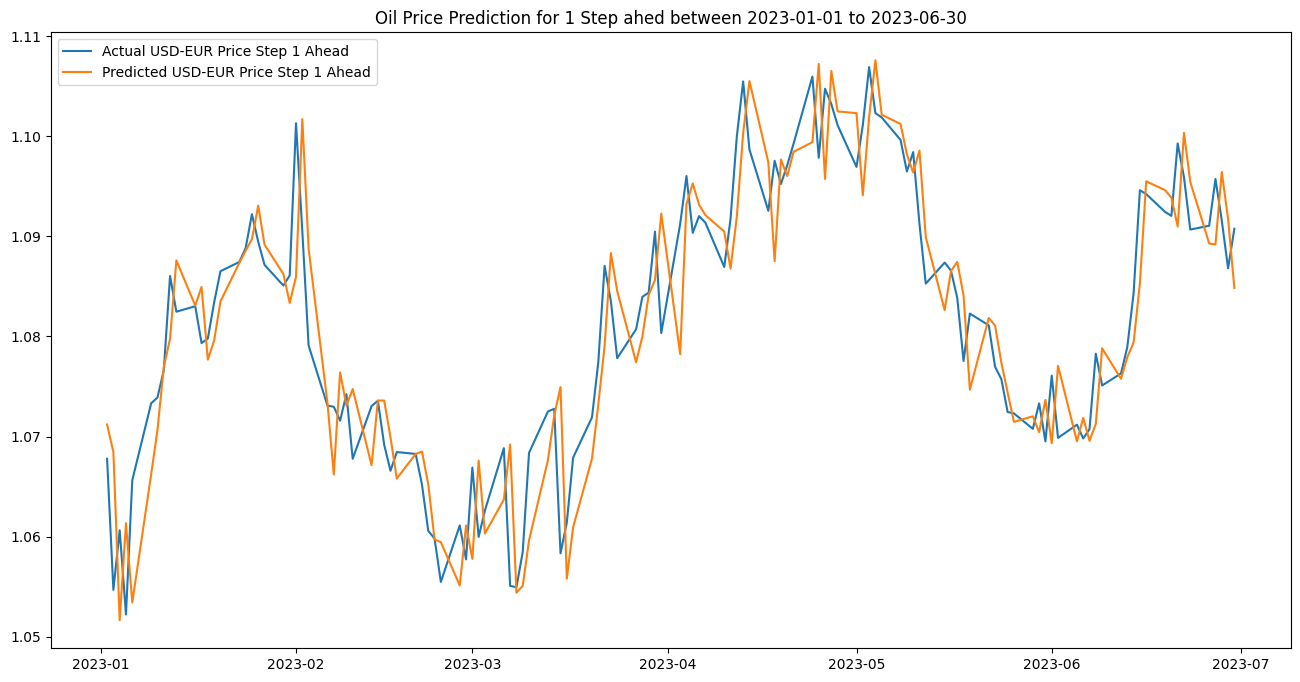

In [22]:
compare_plots(test_data['Actual_USD_EUR_Price_t+1'],
              test_data['Predicted_USD_EUR_Price_t+1'],
              "Actual USD-EUR Price Step 1 Ahead",
              "Predicted USD-EUR Price Step 1 Ahead",
              "Oil Price Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30")


# 5 Step Ahead Predicction Plot Comparison

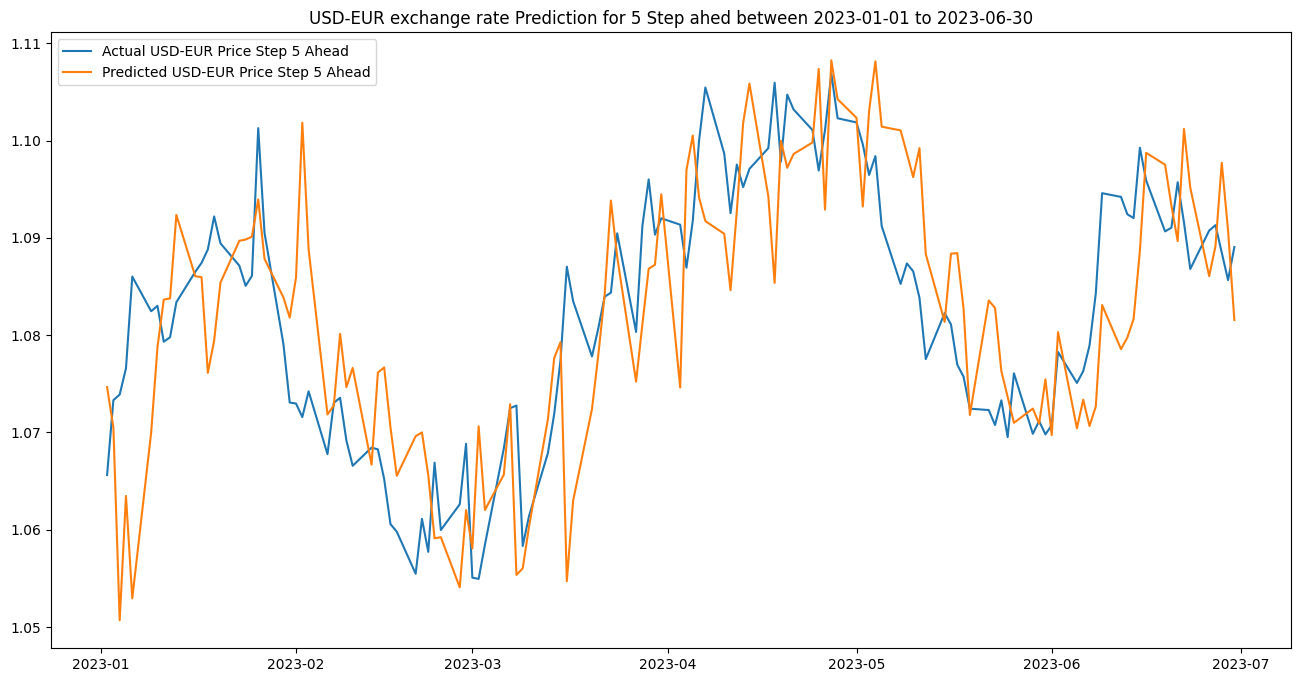

In [23]:
compare_plots(test_data['Actual_USD_EUR_Price_t+5'],
              test_data['Predicted_USD_EUR_Price_t+5'],
              "Actual USD-EUR Price Step 5 Ahead",
              "Predicted USD-EUR Price Step 5 Ahead",
              "USD-EUR exchange rate Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30")


#Oil

# Selecting the Feature Columns & Prediction Column whcih will be used for Prediction


In [24]:
DateAttributes=[]


In [25]:
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-')]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
FeatureColumnsOil.extend(DateAttributes)

PredictedColumnOil='Actual_Oil_Price_t+1'
FeatureColumnsOil

['Actual_Oil_Price_t',
 'Actual_Oil_Price_t-1',
 'Actual_Oil_Price_t-2',
 'Actual_Oil_Price_t-3',
 'Actual_Oil_Price_t-4']

# Scaling the values to bring them on same Scale


In [26]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Initialize the scalers
Oilscaler = MinMaxScaler(feature_range=(0,1))
Oilscaler_y = MinMaxScaler(feature_range=(0,1))

# Extract and scale the input features
X_train_oil = train_data[FeatureColumnsOil].values
X_train_oil_scaled = Oilscaler.fit_transform(X_train_oil)

# Extract and scale the target variable, then reshape to 1D array for training
Y_train_oil = train_data[PredictedColumnOil].values
Y_train_oil_scaled = Oilscaler_y.fit_transform(Y_train_oil.reshape(-1,1)).ravel()


#Finding the Best Param


In [27]:
# Assuming you have X_train and Y_train already defined
best_params_Oil = find_best_svr_params(X_train_oil_scaled, Y_train_oil_scaled.ravel())
selected_columns = best_params_Oil.groupby('param_kernel')[['mean_test_score']].idxmax()
best_params_Oil = best_params_Oil.loc[selected_columns['mean_test_score'],
                         ['param_kernel', 'param_C',
                          'param_epsilon',
                          'mean_test_score']]
best_params_Oil.sort_values(by='mean_test_score', ascending=False)


,param_kernel,param_C,param_epsilon,mean_test_score
0,linear,100,0.01,0.921140
2,rbf,100,0.01,0.901164
4,sigmoid,100,0.01,0.892291


#Fitting the Model


In [28]:
for index, params in best_params_Oil.iterrows():
    model = train_svr(X_train_oil_scaled, Y_train_oil_scaled.ravel(), params.to_dict())

Score for linear: 0.9948363535916092
Score for rbf: 0.9959473500076673
Score for sigmoid: -160483319.15647054


In [29]:
Oil_params = best_params_Cur[best_params_Cur['param_kernel'] == 'rbf']

Oilmodel = train_svr(X_train_oil_scaled, Y_train_oil_scaled.ravel(), Oil_params.iloc[0].to_dict())

Score for rbf: 0.9959473500076673


#Finding the support vectors


In [30]:

support_vector_indices = Oilmodel.support_
support_vectors_df = train_data.iloc[support_vector_indices]
support_vectors_df[['Actual_Oil_Price_t+1']].tail(5)


,Actual_Oil_Price_t+1
Date,
2022-12-13,79.97
2022-12-15,78.73
2022-12-21,81.14
2022-12-23,82.23
2022-12-28,80.39


# Recursive multi-step forecasting using 1 Step Ahead model to Predict upto 5 Step Ahead for Oil Price


In [31]:
FeatureColumnsOil = [col for col in df_oil_currency.columns if col.startswith('Actual_Oil_Price_t-')]
FeatureColumnsOil.insert(0,'Actual_Oil_Price_t')
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  print(FeatureColumnsOil)
  X_test = test_data[FeatureColumnsOil+DateAttributes].values
  X_test_scaled = Oilscaler.transform(X_test)
  scaled_predictions = Oilmodel.predict(X_test_scaled)
  scaled_predictions = scaled_predictions.reshape(-1, 1)
  predictions = Oilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_Oil_Price_t+'+str(i)] = predictions
  FeatureColumnsOil.pop(-1)
  FeatureColumnsOil.insert(0,'Predicted_Oil_Price_t+'+str(i))


['Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3', 'Actual_Oil_Price_t-4']
['Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2', 'Actual_Oil_Price_t-3']
['Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1', 'Actual_Oil_Price_t-2']
['Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t', 'Actual_Oil_Price_t-1']
['Predicted_Oil_Price_t+4', 'Predicted_Oil_Price_t+3', 'Predicted_Oil_Price_t+2', 'Predicted_Oil_Price_t+1', 'Actual_Oil_Price_t']


In [32]:
Oilresults = []

StepsAheadPrediction = 5
for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_Oil_Price_t+{i}'
    predicted_col = f'Predicted_Oil_Price_t+{i}'
    Oilresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Oilmetrics = pd.DataFrame(Oilresults)
Oilmetrics


,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_Oil_Price_t+1,Predicted_Oil_Price_t+1,1,1.218866,2.607215,1.614687,1.552166
1,Actual_Oil_Price_t+2,Predicted_Oil_Price_t+2,2,1.841036,5.824109,2.413319,2.342691
2,Actual_Oil_Price_t+3,Predicted_Oil_Price_t+3,3,2.278260,8.607721,2.933892,2.893826
3,Actual_Oil_Price_t+4,Predicted_Oil_Price_t+4,4,2.644637,10.657757,3.264622,3.354701
4,Actual_Oil_Price_t+5,Predicted_Oil_Price_t+5,5,2.994492,13.614758,3.689818,3.792643


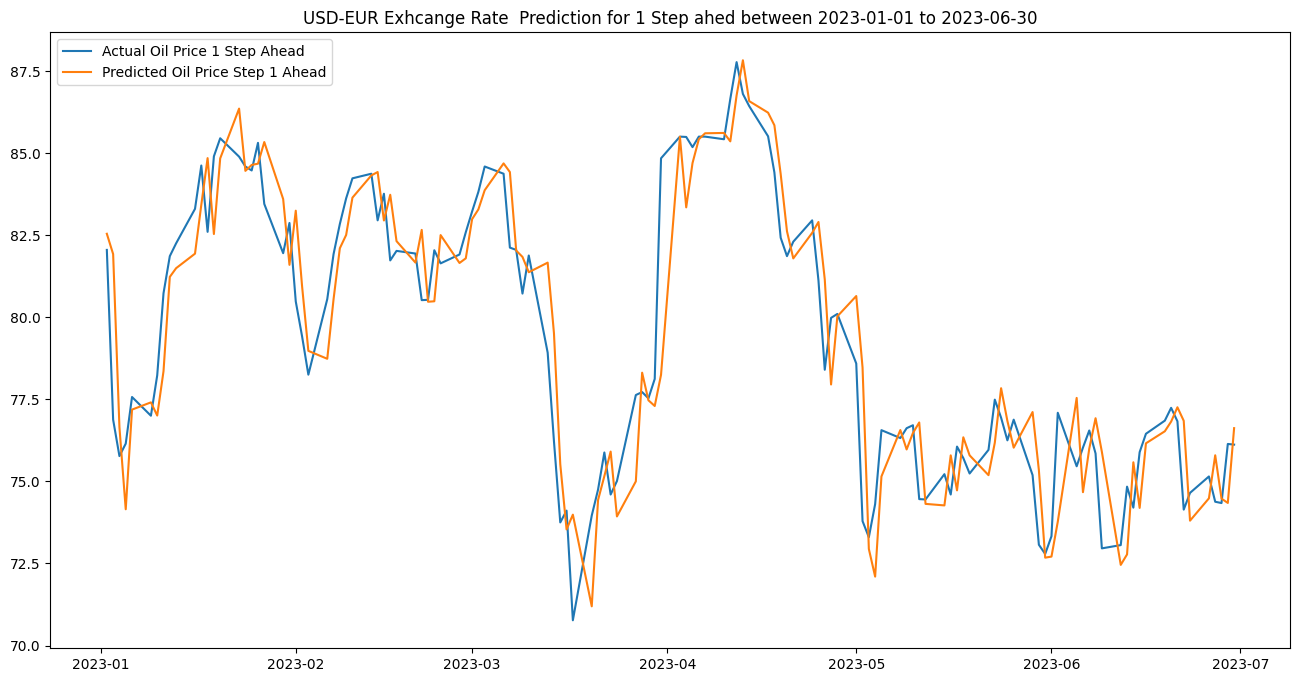

In [33]:
compare_plots(test_data['Actual_Oil_Price_t+1'],
              test_data['Predicted_Oil_Price_t+1'],
              "Actual Oil Price 1 Step Ahead",
              "Predicted Oil Price Step 1 Ahead",
              "USD-EUR Exhcange Rate  Prediction for 1 Step ahed between 2023-01-01 to 2023-06-30")


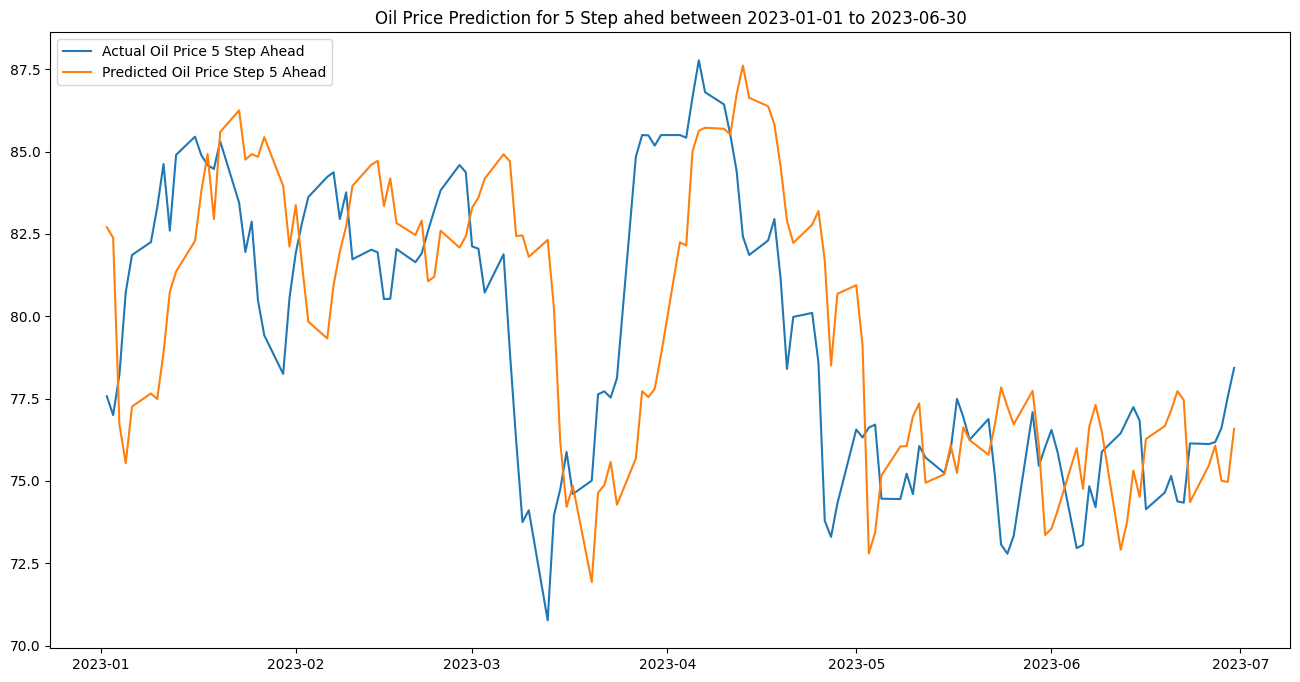

In [34]:
compare_plots(test_data['Actual_Oil_Price_t+5'],
              test_data['Predicted_Oil_Price_t+5'],
              "Actual Oil Price 5 Step Ahead",
              "Predicted Oil Price Step 5 Ahead",
              "Oil Price Prediction for 5 Step ahed between 2023-01-01 to 2023-06-30")


#Currency + OIL

# Selecting the Feature Columns & Prediction Column which will be used for Prediction


In [35]:
DateAttributes=[]


In [36]:
FeatureColumnsOilCurrency = [col for col in train_data.columns if col.startswith('Actual_USD_EUR_Price_t-')]
FeatureColumnsOilCurrency.insert(0,'Actual_USD_EUR_Price_t')
FeatureColumnsOilCurrency.append('Actual_Oil_Price_t+1')
FeatureColumnsOilCurrency.extend(DateAttributes)

PredictedColumnOilCurrency='Actual_USD_EUR_Price_t+1'
FeatureColumnsOilCurrency

['Actual_USD_EUR_Price_t',
 'Actual_USD_EUR_Price_t-1',
 'Actual_USD_EUR_Price_t-2',
 'Actual_USD_EUR_Price_t-3',
 'Actual_USD_EUR_Price_t-4',
 'Actual_Oil_Price_t+1']

# Scaling the values to bring them on same Scale


In [37]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler
CurOilscaler = StandardScaler()

X_train = train_data[FeatureColumnsOilCurrency].values
X_train_CurOilscaled = CurOilscaler.fit_transform(X_train)

CurOilscaler_y = StandardScaler()

Y_train = train_data[PredictedColumnOilCurrency].values
Y_train_CurOilscaled = CurOilscaler_y.fit_transform(Y_train.reshape(-1,1))



#Finding the Best Param


In [38]:
# Assuming you have X_train and Y_train already defined
best_params_CurOil = find_best_svr_params(X_train_CurOilscaled, Y_train_CurOilscaled.ravel())
selected_columns = best_params_CurOil.groupby('param_kernel')[['mean_test_score']].idxmax()
best_params_CurOil = best_params_CurOil.loc[selected_columns['mean_test_score'],
                         ['param_kernel', 'param_C',
                          'param_epsilon',
                          'mean_test_score']]
best_params_CurOil.sort_values(by='mean_test_score', ascending=False)

,param_kernel,param_C,param_epsilon,mean_test_score
0,linear,100,0.01,0.865534
7,rbf,100,0.01,0.798726
12,sigmoid,1,0.01,0.696399


In [39]:
for index, params in best_params_CurOil.iterrows():
    model = train_svr(X_train_CurOilscaled, Y_train_CurOilscaled.ravel(), params.to_dict())

Score for linear: 0.9931549718984329
Score for rbf: 0.9944155017948789
Score for sigmoid: -1710.259078019862


#Fitting the Model

In [40]:

CurOil_params = best_params_Cur[best_params_Cur['param_kernel'] == 'rbf']
CurOilmodel = train_svr(X_train_CurOilscaled, Y_train_CurOilscaled.ravel(), CurOil_params.iloc[0].to_dict())

Score for rbf: 0.9944155017948789


#Recursive multi-step forecasting using 1 Step Ahead model to Preict upto 5 Step Ahead for USD-EUR Exchange rate by using Oil Prices to validate its impact


In [41]:
FeatureColumnsOilCurrency=['Actual_USD_EUR_Price_t','Actual_USD_EUR_Price_t-1','Actual_USD_EUR_Price_t-2','Actual_USD_EUR_Price_t-3','Actual_USD_EUR_Price_t-4']
StepsAheadPrediction=5
for i in range(1,StepsAheadPrediction+1):
  FeatureColumnsOilCurrency.append('Predicted_Oil_Price_t+'+ str(i))
  print(FeatureColumnsOilCurrency)
  X_test = test_data[FeatureColumnsOilCurrency+DateAttributes].values
  X_test_scaled = CurOilscaler.transform(X_test)
  scaled_predictions = CurOilmodel.predict(X_test_scaled).reshape(-1, 1)
  # inverse transform the scaled predictions
  predictions = CurOilscaler_y.inverse_transform(scaled_predictions)
  test_data['Predicted_USD_EUR_Price_WithOil_t+'+str(i)] = predictions
  FeatureColumnsOilCurrency.remove('Predicted_Oil_Price_t+'+ str(i))
  FeatureColumnsOilCurrency.pop(-1)
  FeatureColumnsOilCurrency.insert(0,'Predicted_USD_EUR_Price_WithOil_t+'+str(i))


['Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Actual_USD_EUR_Price_t-4', 'Predicted_Oil_Price_t+1']
['Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Actual_USD_EUR_Price_t-3', 'Predicted_Oil_Price_t+2']
['Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Actual_USD_EUR_Price_t-2', 'Predicted_Oil_Price_t+3']
['Predicted_USD_EUR_Price_WithOil_t+3', 'Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Actual_USD_EUR_Price_t-1', 'Predicted_Oil_Price_t+4']
['Predicted_USD_EUR_Price_WithOil_t+4', 'Predicted_USD_EUR_Price_WithOil_t+3', 'Predicted_USD_EUR_Price_WithOil_t+2', 'Predicted_USD_EUR_Price_WithOil_t+1', 'Actual_USD_EUR_Price_t', 'Predicted_Oil_Price_t+5']


In [42]:
Exchangeresults = []
StepsAheadPrediction = 5

for i in range(1, StepsAheadPrediction+1):
    actual_col = f'Actual_USD_EUR_Price_t+{i}'
    predicted_col = f'Predicted_USD_EUR_Price_WithOil_t+{i}'
    Exchangeresults.append(calculate_metrics(test_data[actual_col], test_data[predicted_col], actual_col, predicted_col, i))

Exchangemetrics = pd.DataFrame(Exchangeresults)
Exchangemetrics

,Original Column,Predicted Column,Steps Ahead,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Mean Absolute Percentage Error
0,Actual_USD_EUR_Price_t+1,Predicted_USD_EUR_Price_WithOil_t+1,1,0.004621,0.000032,0.005694,0.427805
1,Actual_USD_EUR_Price_t+2,Predicted_USD_EUR_Price_WithOil_t+2,2,0.005729,0.000053,0.007248,0.529623
2,Actual_USD_EUR_Price_t+3,Predicted_USD_EUR_Price_WithOil_t+3,3,0.006412,0.000064,0.007994,0.592714
3,Actual_USD_EUR_Price_t+4,Predicted_USD_EUR_Price_WithOil_t+4,4,0.007101,0.000078,0.008806,0.656033
4,Actual_USD_EUR_Price_t+5,Predicted_USD_EUR_Price_WithOil_t+5,5,0.007879,0.000098,0.009879,0.727181


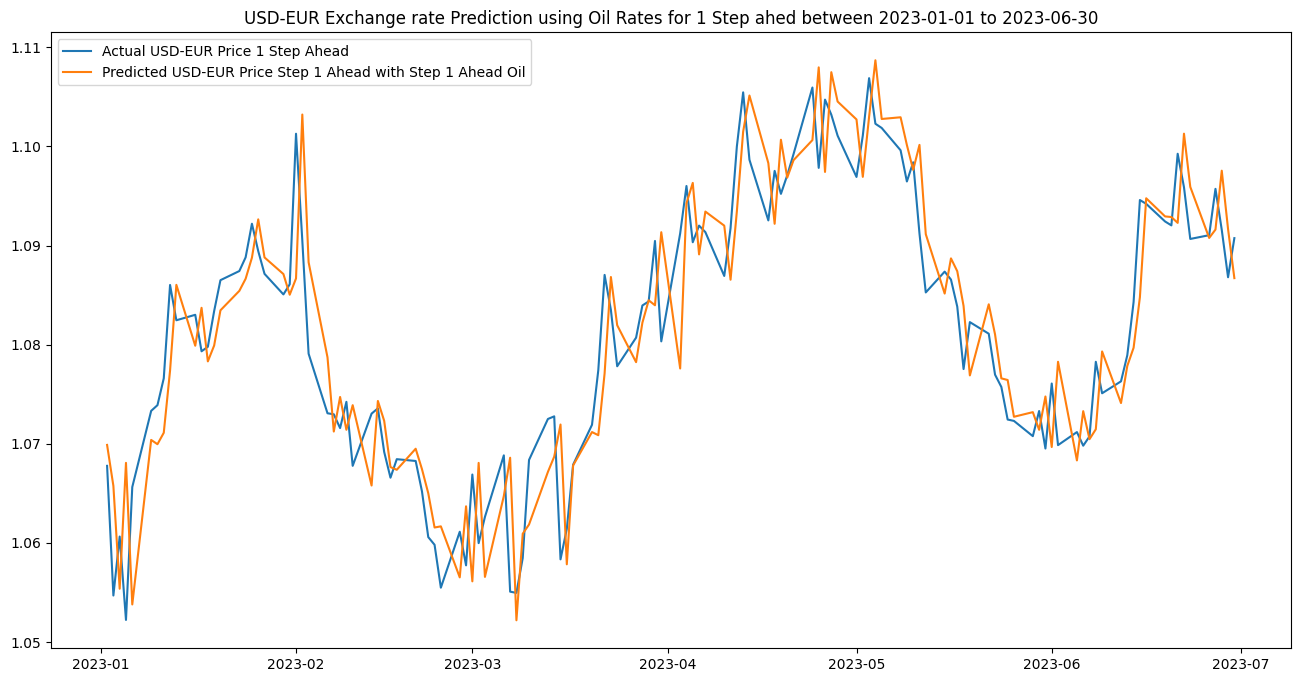

In [43]:
compare_plots(test_data['Actual_USD_EUR_Price_t+1'],
              test_data['Predicted_USD_EUR_Price_WithOil_t+1'],
              "Actual USD-EUR Price 1 Step Ahead",
              "Predicted USD-EUR Price Step 1 Ahead with Step 1 Ahead Oil",
              "USD-EUR Exchange rate Prediction using Oil Rates for 1 Step ahed between 2023-01-01 to 2023-06-30")


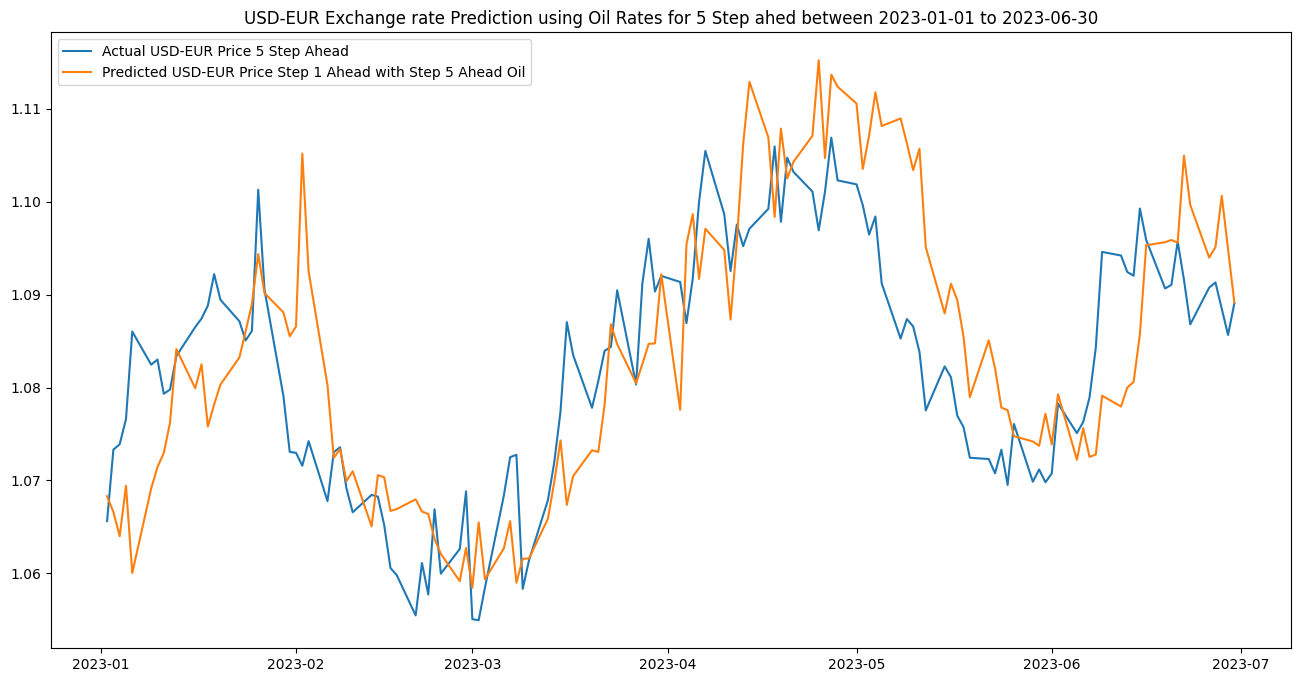

In [44]:
compare_plots(test_data['Actual_USD_EUR_Price_t+5'],
              test_data['Predicted_USD_EUR_Price_WithOil_t+5'],
              "Actual USD-EUR Price 5 Step Ahead",
              "Predicted USD-EUR Price Step 1 Ahead with Step 5 Ahead Oil",
              "USD-EUR Exchange rate Prediction using Oil Rates for 5 Step ahed between 2023-01-01 to 2023-06-30")
